## Assignment-07 First Step of using machine learning and models.

![](https://github.com/Computing-Intelligence/jupyters_and_slides/raw/master/entrance-test/images/kkb-ai.png)

In [1]:
fname = '/Users/gaominquan/Downloads/sqlResult_1558435 2.csv'

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(fname, encoding='gb18030')

In [4]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
xinhua_news = content[content['source'] == '新华社']

In [6]:
len(xinhua_news) / len(content)

0.8778051801676133

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [4]:
# it‘s your time
import pandas as pd
csv_name = './sqlResult_1558435.csv'
init_content = pd.read_csv(csv_name, encoding='gb18030')

In [5]:
init_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [6]:
# it's your time
flag_list = []
for source in init_content.source:
    if source == '新华社':
        flag_list.append(1)
    else:
        flag_list.append(0)
new_content = pd.DataFrame(zip(init_content.content, flag_list), columns=['content', 'flag'])
new_content = new_content.dropna(subset=['flag', 'content'])
new_content.shape[0]

87054

### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对

对文本进行向量化

In [7]:
import jieba,re
reg = re.compile('\w+')
cuts = []
contents = pd.Series(new_content['content']).astype(str)
for (i,content) in enumerate(contents):
    sentences = []
    if (i % 5000 == 0):
        print(i)
    sentences += reg.findall(content)
    cut = []
    for s in sentences:
        cut += jieba.cut(s)
    cuts.append(' '.join(cut))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache


0


Loading model cost 1.049 seconds.
Prefix dict has been built succesfully.


5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=300)
X = vectorizer.fit_transform(cuts)

In [9]:
X.shape[0]

87054

### Step4: 参考scikit-learning的方法，构建你的第一个机器学习模型

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

+ 参照scikit learning的示例，从构建你的第一个KNN机器学习模型。

#### 训练集，验证集，测试集
训练集用来训练模型
验证集用来调参
测试集用来测试模型

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
y = pd.Series(new_content['flag']).astype(int)
X_train, X_two, y_train, y_two = train_test_split(X, y, test_size=0.33, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_two, y_two, test_size=0.5, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [11]:
y_predict = neigh.predict(X_valid)
scores = neigh.score(X_valid, y_valid)

In [12]:
print('acc:{}'.format(sum(y_predict == y_valid) / X_valid.shape[0]), scores)
X_valid.shape[0]

acc:0.9206349206349206 0.9206349206349206


14364

### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

#### Precision又叫查准率，Recall又叫查全率。这两个指标共同衡量才能评价模型输出结果。
TP: 预测为1(Positive)，实际也为1(Truth-预测对了)
TN: 预测为0(Negative)，实际也为0(Truth-预测对了)
FP: 预测为1(Positive)，实际为0(False-预测错了)
FN: 预测为0(Negative)，实际为1(False-预测错了)
总的样本个数为：TP+TN+FP+FN。
#### Accuracy/Precision/Recall的定义
Accuracy = (预测正确的样本数)/(总样本数)=(TP+TN)/(TP+TN+FP+FN)

Precision = (预测为1且正确预测的样本数)/(所有预测为1的样本数) = TP/(TP+FP)

Recall = (预测为1且正确预测的样本数)/(所有真实情况为1的样本数) = TP/(TP+FN)

F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [13]:
# it's your time
def calcul_coef(nb, X, y):
    y_predict = nb.predict(X)
    acc = sum(y_predict == y) / X.shape[0]
    tp = tn = fp = fn = 0
    for (y_pre, y_real) in zip(y_predict, y):
        if y_pre == 1 and y_real == 1:
            tp += 1
        if y_pre == 0 and y_real == 0:
            tn += 1
        if y_pre == 0 and y_real == 0:
            fp += 1
        if y_pre == 0 and y_real == 1:
            fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)    
    f1 = 2 * (precision * recall) / (precision + recall) 
    return (acc, precision, recall, f1)

In [14]:
print('train data: {}'.format(calcul_coef(neigh, X_train, y_train)))

train data: (0.9448273497239653, 0.93066342454816, 0.9735942898363643, 0.9516449260571874)


### Step6: 使用 test_data 对其进行新数据的判断

In [15]:
# it's your time
acc_test, precision_test, recall_test, f1_test = calcul_coef(neigh, X_test, y_test)
print('acc_test:', acc_test)
print('precision_test:', precision_test)
print('recall_test:', recall_test)
print('f1_test:', f1_test)

acc_test: 0.9180590364800891
precision_test: 0.9423674831273223
recall_test: 0.9610982211910286
f1_test: 0.9516406938009726


### Step7: 调整不同的参数，观察变化

In [16]:
import time
best_mf = -1
best_score = 0
values_mf = []
for i in range(100, 1100, 100):
    print(i)
    time_start = time.time()
    vectorizer = TfidfVectorizer(max_features=i)
    X = vectorizer.fit_transform(cuts)    
    X_train_mf, X_two_mf, y_train_mf, y_two_mf = train_test_split(X, y, test_size=0.33, random_state=42)
    X_valid_mf, X_test_mf, y_valid_mf, y_test_mf = train_test_split(X_two_mf, y_two_mf, test_size=0.5, random_state=42)
    neigh_mf = KNeighborsClassifier(n_neighbors=6)
    neigh_mf.fit(X_train_mf, y_train_mf)   
    acc_mf, precision_mf, recall_mf, f1_mf = calcul_coef(neigh_mf, X_valid_mf, y_valid_mf)
    values_mf.append((acc_mf, precision_mf, recall_mf, f1_mf))
    print('valid data: accuracy-', acc_mf, 'precision-', precision_mf, 'recall-', recall_mf, 'f1-', f1_mf)
    if acc_mf > best_score:
        best_mf = i
        best_score = acc_mf
    duration = time.time() - time_start
    print('duration', duration)
print('最好的mf为:%d,最好的得分为:%.4f'%(best_mf,best_score))

100
valid data: accuracy- 0.9202172096908939 precision- 0.9464366772582842 recall- 0.958400367731556 f1- 0.9523809523809524
duration 64.95380401611328
200
valid data: accuracy- 0.9252993595098858 precision- 0.9486870814837108 recall- 0.9659848310733165 f1- 0.9572578196173702
duration 68.4921646118164
300
valid data: accuracy- 0.9206349206349206 precision- 0.9461584996975196 recall- 0.9585535892132077 f1- 0.9523157133614948
duration 69.31715512275696
400
valid data: accuracy- 0.9198691172375383 precision- 0.9472489215166882 recall- 0.9588600321765112 f1- 0.9530191121602072
duration 69.86476945877075
500
valid data: accuracy- 0.9161097187412977 precision- 0.9490082833042024 recall- 0.9567149314333869 f1- 0.9528460247215016
duration 69.69087314605713
600
valid data: accuracy- 0.9169451406293512 precision- 0.9480677245463518 recall- 0.956638320692561 f1- 0.9523337400854178
duration 69.92473077774048
700
valid data: accuracy- 0.9115845168476747 precision- 0.9500534595998167 recall- 0.953037

In [29]:
from pyecharts import options as opts
from pyecharts.charts import Bar

def bar_mf() -> Bar:
    c = (
        Bar()
        .add_xaxis([str(i) for i in range(100, 1100, 100)])
        .add_yaxis("accuracy", [v[0] for v in values_mf])        
        .add_yaxis("precision", [v[1] for v in values_mf])       
        .add_yaxis("recall", [v[2] for v in values_mf])       
        .add_yaxis("f1", [v[3] for v in values_mf])
        .set_global_opts(title_opts=opts.TitleOpts(title="max_features柱状图", subtitle=""))
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值", value="max")
                ],
                label_opts=opts.LabelOpts(position="inside", color="#fff", font_size=8, formatter='max')
            ),
        )
    )
    return c

In [30]:
values_mf

[(0.9202172096908939,
  0.9464366772582842,
  0.958400367731556,
  0.9523809523809524),
 (0.9252993595098858,
  0.9486870814837108,
  0.9659848310733165,
  0.9572578196173702),
 (0.9206349206349206,
  0.9461584996975196,
  0.9585535892132077,
  0.9523157133614948),
 (0.9198691172375383,
  0.9472489215166882,
  0.9588600321765112,
  0.9530191121602072),
 (0.9161097187412977,
  0.9490082833042024,
  0.9567149314333869,
  0.9528460247215016),
 (0.9169451406293512,
  0.9480677245463518,
  0.956638320692561,
  0.9523337400854178),
 (0.9115845168476747,
  0.9500534595998167,
  0.9530376158737455,
  0.9515431980724366),
 (0.9119326093010304,
  0.9519047255515688,
  0.9552593273576956,
  0.9535790761700826),
 (0.9132553606237817,
  0.9531940844640951,
  0.9579407032866007,
  0.9555614993695312),
 (0.9113756613756614,
  0.9524864410663815,
  0.9552593273576956,
  0.9538708690330477)]

In [39]:
# bar_mf().render_notebook() # notebook有时候显现不出来，故保存到html里可以双击render_mf.html打开,截图如下
bar_mf().render('render_mf.html')

'E:\\nlp学习\\nlp_homework\\homework_7\\render_mf.html'

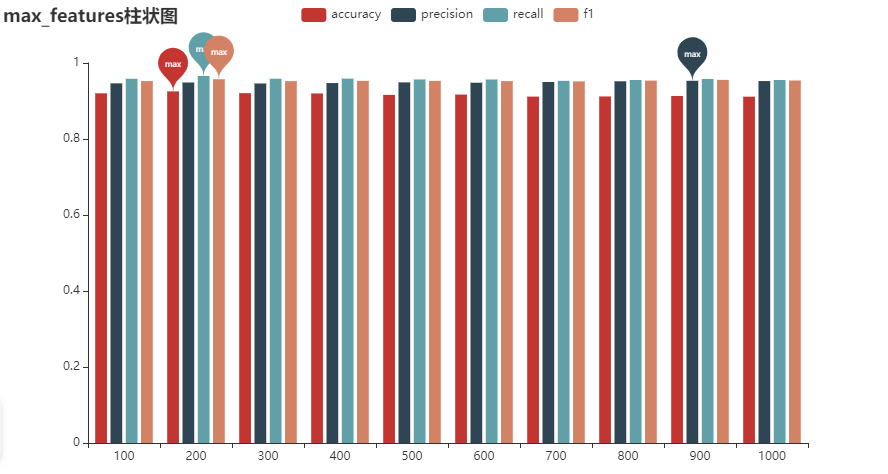由图可以看到，accuracy、recall、f1都是200时最佳，综合衡量选200为max_features的值

In [33]:
# it's your time
best_k = -1
best_score = 0
values_k = []
vectorizer = TfidfVectorizer(max_features=200)
X = vectorizer.fit_transform(cuts)    
X_train_k, X_two_k, y_train_k, y_two_k = train_test_split(X, y, test_size=0.33, random_state=42)
X_valid_k, X_test_k, y_valid_k, y_test_k = train_test_split(X_two_k, y_two_k, test_size=0.5, random_state=42)

for i in range(1,11):
    print(i)    
    time_ = time.time()    
    neigh_k = KNeighborsClassifier(n_neighbors=i)
    neigh_k.fit(X_train_k, y_train_k)   
    value_set = calcul_coef(neigh_k, X_valid_k, y_valid_k)
    print(value_set)
    values_k.append(value_set)
    scores = value_set[0]
    if scores > best_score:
        best_score = scores
        best_k = i
    duration = time.time() - time_
    print('duration:', duration)
print('最好的k为:%d,最好的得分为:%.4f'%(best_k,best_score))

1
(0.9331662489557226, 0.9390480453595942, 0.9642993947751475, 0.9515062176361644)
duration: 43.588027477264404
2
(0.9129072681704261, 0.9271715091893541, 0.9314333869608519, 0.9292975617213177)
duration: 50.36183452606201
3
(0.9282929546087441, 0.9473526323683816, 0.9677468781123113, 0.9574411642096488)
duration: 46.501222372055054
4
(0.9262740183792816, 0.9406238256294626, 0.9587834214356853, 0.9496168146293346)
duration: 46.9946928024292
5
(0.9287106655527708, 0.9558470764617691, 0.9768635562705892, 0.9662410487629297)
duration: 48.05127239227295
6
(0.9252993595098858, 0.9486870814837108, 0.9659848310733165, 0.9572578196173702)
duration: 50.28068256378174
7
(0.9262740183792816, 0.9594137542277339, 0.9779361066421512, 0.9685863874345549)
duration: 53.73375058174133
8
(0.9241854636591479, 0.9543502824858757, 0.9705814755228683, 0.9623974475843209)
duration: 50.23191833496094
9
(0.927109440267335, 0.9611023503792145, 0.9805408718302306, 0.9707243079256732)
duration: 48.53896355628967
1

In [40]:
from pyecharts import options as opts
from pyecharts.charts import Bar

def bar_k() -> Bar:
    c = (
        Bar()
        .add_xaxis([str(i) for i in range(1,11)])
        .add_yaxis("accuracy", [v[0] for v in values_k])
        .add_yaxis("precision", [v[1] for v in values_k])        
        .add_yaxis("recall", [v[2] for v in values_k])        
        .add_yaxis("f1", [v[3] for v in values_k])
        .set_global_opts(title_opts=opts.TitleOpts(title="k柱状图", subtitle=""))
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值", value="max")
                ],
                label_opts=opts.LabelOpts(position="inside", color="#fff", font_size=8, formatter='max')
            )
        )
    )
    return c

In [41]:
# bar_k().render_notebook() # notebook有时候显现不出来，故保存到html里可以双击render-k.html打开,截图如下
bar_k().render('./render-k.html')

'E:\\nlp学习\\nlp_homework\\homework_7\\render-k.html'

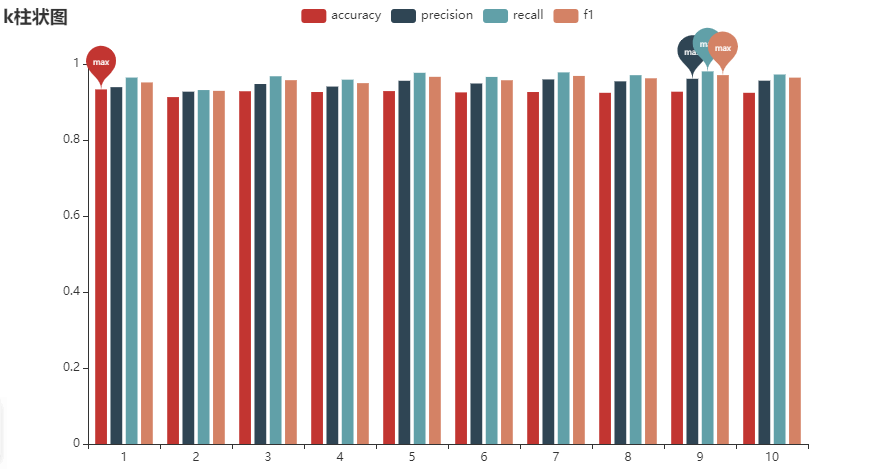由上图可以看出，除了accuracy外，其他参数都是在k=9时最大，综合衡量取k=9

### Step8: 不断改变参数，直到性能达到“某个”点。问：“某个”怎么定义？

各指标尽量最优，时间尽量最短的点，某种意义上可以看做几个指标的加权

### Step9: 找出所以预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

现在选的参数为 k = 9，max_features = 200,则模型如下：

In [42]:
neigh_k = KNeighborsClassifier(n_neighbors=9)
neigh_k.fit(X_train_k, y_train_k)
y_predict_k = neigh_k.predict(X.toarray())

In [43]:
new_content['pred'] = y_predict_k
new_content.head()

,content,flag,pred
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0,1
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0,0
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0,0
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,1,1
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0,1


In [44]:
copy_news = new_content[(new_content.flag == 0) & (new_content.pred == 1)]
copy_news.head()

,content,flag,pred
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0,1
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0,1
8,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,0,1
15,中国证券网讯（记者 费天元）沪深两市周五临近午盘出现快速跳水，沪指连续跌穿5日、10日及...,0,1
24,北京时间6月20日，江苏苏宁足球俱乐部发布了足协杯第四轮江苏苏宁易购队主场对阵河南建业队的官...,0,1


### Step10： 总结该过程，什么是数据思维？什么是机器学习思维？

数据思维是指用科学、数据的手段解决现实生活中的问题。
机器学习思维是指不断改变参数值，调出合适合理的参数，以达到某种最适当的解。

### (Optional)使用第4课讲解的 edit distance，在涉嫌抄袭的文章中，找到其重复的文字与被修改过的文字。 

### Step11: 利用第8课讲述的新模型，进行操作，感受其中不同的参数、模型对性能的影响。

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.9670008354218881

既快又好，换为KNN的最佳max_feature感受一下

In [47]:
clf_k = LogisticRegression().fit(X_train_k, y_train_k)
clf_k.score(X_valid_k, y_valid_k)

0.9678362573099415